# ISSUE

Purpose: Prediction of customers who leave the telecommunications company.

The problem of classification is one of the most frequently discussed in Data Science. And telecommunications companies have a lot of data about consumers.

Link to Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn


# VARIABLES

1. CustomerID
2. gender - Customer gender (female, male) - binary
3. SeniorCitizen (Whether the customer is a senior citizen or not (1, 0)) - binary
4. Partner (Whether the customer has a partner or not (Yes, No)) - binary
5. Dependents (Whether the customer has dependents or not (Yes, No)) - binary
6. tenure (Number of months the customer has stayed with the company) - continuous
7. PhoneService (Whether the customer has a phone service or not (Yes, No)) - binary
8. MultipleLines (Whether the customer has multiple lines or not (Yes, No, No phone service)) - 3 classes
9. InternetService (Customer’s internet service provider (DSL, Fiber optic, No)) - 4 classes
10. OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)) - 3 classes
11. OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)) - 3 classes
12. DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)) - 3 classes
13. TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)) - 3 classes
14. StreamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)) - 3 classes
15. StreamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)) - 3 classes
16. Contract (The contract term of the customer (Month-to-month, One year, Two year)) - 3 classes
17. PaperlessBilling (Whether the customer has paperless billing or not (Yes, No)) - binary
18. PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))) - 4 classes
19. MonthlyCharges (The amount charged to the customer monthly) - continuous
20. TotalCharges (The total amount charged to the customer) - continuous
21. Churn (Whether the customer churned or not (Yes or No)) - binary (target)


In [1]:
import pandas as pd
import numpy as np

In [2]:
tel = pd.read_table("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep = ",")

# Checking data and preprocessing

In [3]:
#checking nulls
tel.isnull().apply(np.mean) 

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [4]:
#checking formats
tel.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

I would like to transform TotalCharges to numeric (float) and SeniorCitizien to object

In [5]:
tel["TotalCharges"].value_counts() 

20.2       11
           11
19.75       9
19.65       8
19.9        8
20.05       8
19.55       7
45.3        7
20.15       6
19.45       6
20.25       6
20.3        5
20.45       5
69.65       4
75.3        4
19.4        4
44.4        4
19.5        4
69.9        4
19.85       4
20.35       4
50.15       4
49.9        4
44          4
20.5        4
19.2        4
20.4        4
19.95       4
69.95       4
69.6        4
           ..
3983.6      1
1385.85     1
689.75      1
3848.8      1
1339.8      1
1866.45     1
5175.3      1
144.35      1
2731        1
1316.9      1
812.5       1
2658.8      1
2345.2      1
1189.9      1
80.25       1
3168.75     1
24          1
525.55      1
4131.2      1
6705.7      1
3007.25     1
7118.9      1
19.15       1
308.25      1
249.55      1
7261.25     1
18.9        1
1246.4      1
2564.95     1
3629.2      1
Name: TotalCharges, dtype: int64

There are 11 rows without value. I will drop those records (I have to do this to transform TotalCharges to numeric)

In [6]:
tel = tel[tel.TotalCharges != " "] #drop records with "space bar value" :)

In [7]:
tel.shape

(7032, 21)

In [8]:
tel["TotalCharges"] = tel["TotalCharges"].astype(float) #transforming TotalCharges to numeric (float)
tel["SeniorCitizen"] = tel["SeniorCitizen"].astype(str) #transforming SeniorCitizen to string
tel.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#I want to check distribution each object variable in relation to churn
#Firstly I will sort out my variables in dataframe to check distribution comfortably :)
#I create list with sum of categories of variables 
lista = []
for i in range (0,21):
   lista.append(tel.groupby(tel.ix[:,i]).size().shape[0])
lista

[7032, 2, 2, 2, 2, 72, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 1584, 6530, 2]

In [10]:
#I will paste 'lista' in last row of my dataframe
tel.loc[7043] = lista
tel.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No
7043,7032,2,2,2,2,72,2,3,3,3,...,3,3,3,3,3,2,4,1584.00,6530.0,2


In [11]:
#I will sort out my variables using my last row
tel = tel.sort_values(tel.last_valid_index(),axis = 1)
tel.tail(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,PhoneService,Contract,StreamingMovies,StreamingTV,...,OnlineBackup,OnlineSecurity,InternetService,MultipleLines,DeviceProtection,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID
7042,No,Male,0,No,No,Yes,Yes,Two year,Yes,Yes,...,No,Yes,Fiber optic,No,Yes,Bank transfer (automatic),66,105.65,6844.5,3186-AJIEK
7043,2,2,2,2,2,2,2,3,3,3,...,3,3,3,3,3,4,72,1584.00,6530.0,7032


In [12]:
#I can drop last row from my df
tel = tel[:-1]
tel.tail(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,PhoneService,Contract,StreamingMovies,StreamingTV,...,OnlineBackup,OnlineSecurity,InternetService,MultipleLines,DeviceProtection,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID
7041,Yes,Male,1,Yes,No,Yes,Yes,Month-to-month,No,No,...,No,No,Fiber optic,Yes,No,Mailed check,4,74.40,306.6,8361-LTMKD
7042,No,Male,0,No,No,Yes,Yes,Two year,Yes,Yes,...,No,Yes,Fiber optic,No,Yes,Bank transfer (automatic),66,105.65,6844.5,3186-AJIEK


# Category variables

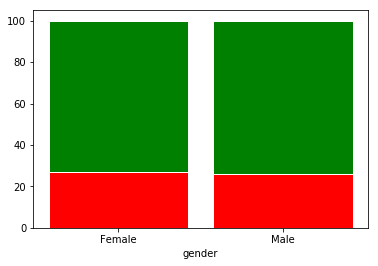

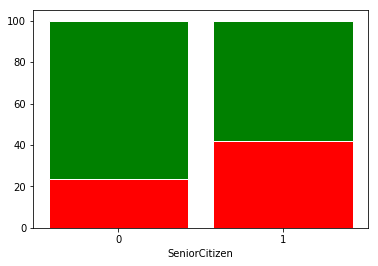

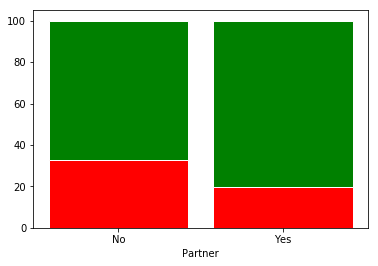

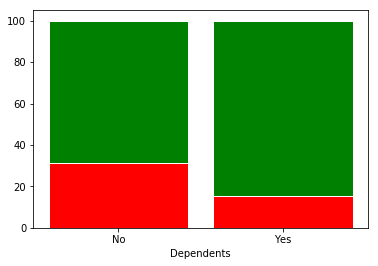

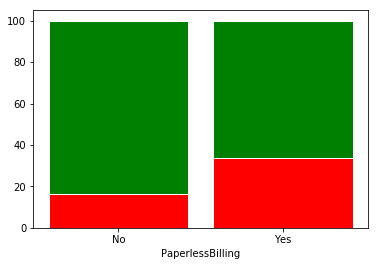

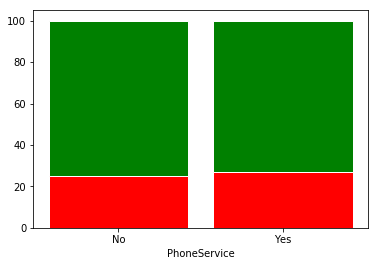

In [13]:
#Creating distribution in realtion to churn
import matplotlib.pyplot as plt 
from matplotlib import rc 


for i in range(1,7): 
    pd1 = pd.crosstab(tel.ix[:,i], tel.Churn, margins=False)

    # Data
    r = [0,1]

    # From raw value to percentage
    totals = [i+j for i,j in zip(pd1['Yes'], pd1['No'])]
    redBars = [i / j * 100 for i,j in zip(pd1['Yes'], totals)]
    greenBars = [i / j * 100 for i,j in zip(pd1['No'], totals)]

    # plot
    barWidth = 0.85
    names = (tel.ix[:,i].sort_values(ascending=True).unique()[0], tel.ix[:,i].sort_values(ascending=True).unique()[1])
    # Create green Bars
    plt.bar(r, greenBars, bottom=redBars, color='g', edgecolor='white', width=barWidth)
    
    # Create red Bars
    plt.bar(r, redBars, color='r', edgecolor='white', width=barWidth)
    
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(tel.columns.values[i])

    # Show graphic
    plt.show()

Analyzing the distribution relative to churn, variable 'gender' and 'PhoneService' do not affect Churn. But I won't drop them because maybe there is more complicated affect.

There is similar distribution but varaibels are related to slightly different area: 'SeniorCitizon' and 'PaperlessBilling' I wille keep both

The same situation is between variables 'Partner' and 'Dependents' (similar distribution but related to slightly different area) I will keep both


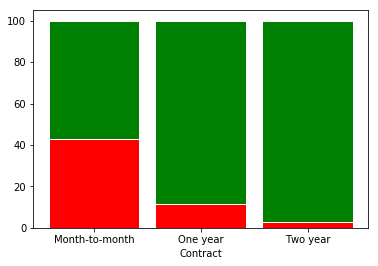

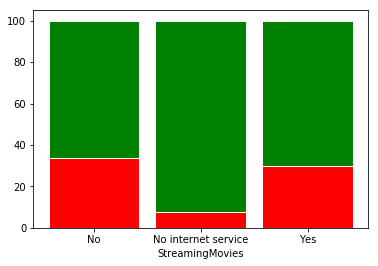

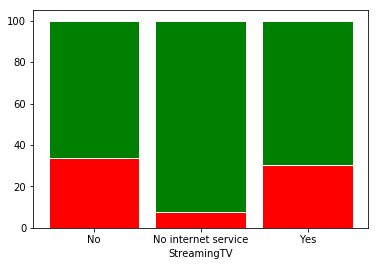

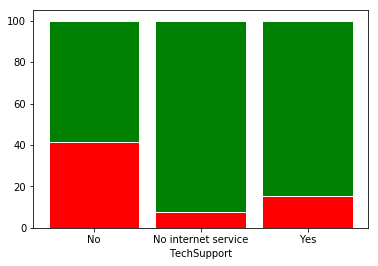

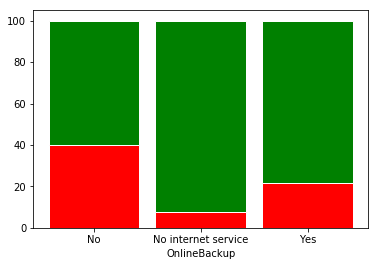

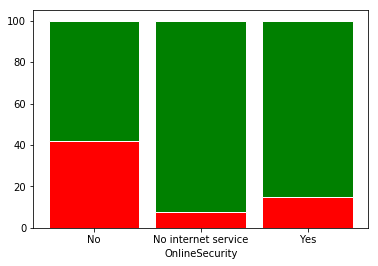

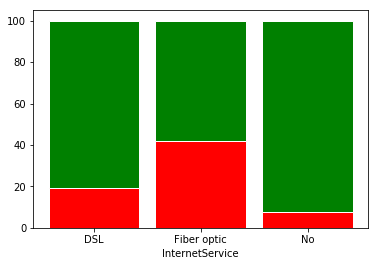

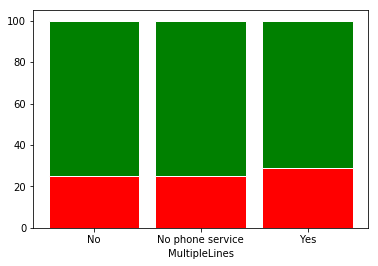

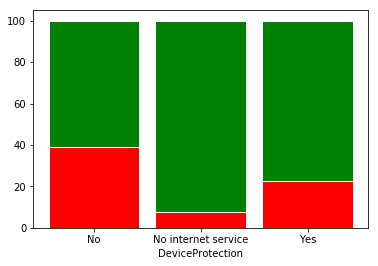

In [14]:
for i in range(7,16): 
    pd1 = pd.crosstab(tel.ix[:,i], tel.Churn, margins=False)

    # Data
    r = [0,1,2]

    # From raw value to percentage
    totals = [i+j for i,j in zip(pd1['Yes'], pd1['No'])]
    redBars = [i / j * 100 for i,j in zip(pd1['Yes'], totals)]
    greenBars = [i / j * 100 for i,j in zip(pd1['No'], totals)]

    # plot
    barWidth = 0.85
    names = (tel.ix[:,i].sort_values(ascending=True).unique()[0], tel.ix[:,i].sort_values(ascending=True).unique()[1], 
             tel.ix[:,i].sort_values(ascending=True).unique()[2])
    # Create green Bars
    plt.bar(r, greenBars, bottom=redBars, color='g', edgecolor='white', width=barWidth)
    
    # Create red Bars
    plt.bar(r, redBars, color='r', edgecolor='white', width=barWidth)
    

    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(tel.columns.values[i])

    # Show graphic
    plt.show()

Analyzing the distribution relative to churn, variable 'MultiplieLines ' do not affect Churn, but I won't drop it because maybe there is more complicated affect.

There is similar distribution 'StreamingTV' and 'StreamingMovies' and those variables are related to the same area: using Internet to watch TV. So I will keep only one of them -> "StreamingTV'

There is similiar situation is with variables 'DeviceProtection" and 'OnlineBackup', 'TechSupport' and "OnlineSecurity' but each variable is related to slighty differant area. So I will keep them all

Analyzing distribution of contract there is more sense to do binary category (month-to-month and long-term-contract)


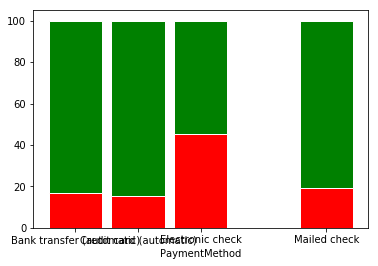

In [15]:
for i in range(16,17): 
    pd1 = pd.crosstab(tel.ix[:,i], tel.Churn, margins=False)

    # Data
    r = [0,1,2,4]

    # From raw value to percentage
    totals = [i+j for i,j in zip(pd1['Yes'], pd1['No'])]
    redBars = [i / j * 100 for i,j in zip(pd1['Yes'], totals)]
    greenBars = [i / j * 100 for i,j in zip(pd1['No'], totals)]

    # plot
    barWidth = 0.85
    names = (tel.ix[:,i].sort_values(ascending=True).unique()[0], tel.ix[:,i].sort_values(ascending=True).unique()[1], 
             tel.ix[:,i].sort_values(ascending=True).unique()[2], tel.ix[:,i].sort_values(ascending=True).unique()[3])
    # Create green Bars
    plt.bar(r, greenBars, bottom=redBars, color='g', edgecolor='white', width=barWidth)
    
    # Create red Bars
    plt.bar(r, redBars, color='r', edgecolor='white', width=barWidth)
    

    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(tel.columns.values[i])

    # Show graphic
    plt.show()


Analyzing distribution of PaymentMethod there is more sense to do binary category (ElectronicCheck and OtherPaymentMethod)

# Numeric Variables

There are only 3 numeric variables, probably TotalCharges is a combination of MonthlyCharges and tenure

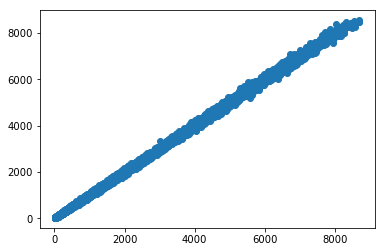

In [16]:
x = tel["TotalCharges"]
y = tel["MonthlyCharges"] * tel["tenure"]

plt.scatter(x, y)
plt.show()

Just a perfect correlation so I will remove TotalCharges from my df 

Let's check are there outlieres among countinous variables...

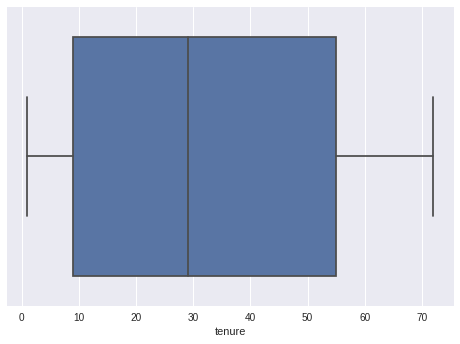

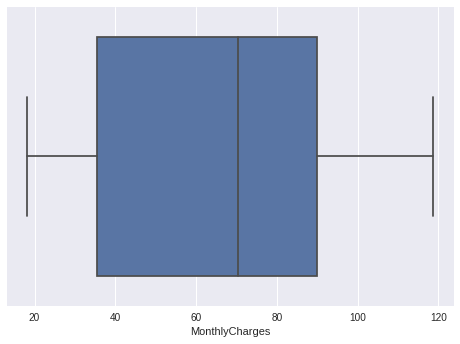

In [17]:
import seaborn as sns
sns.boxplot(tel["tenure"])
plt.show()
sns.boxplot(tel["MonthlyCharges"])
plt.show()

Boxplots show us that there is no outlieres

Next step: I will transform continous variables (monthlyCharges nad tenure) to intervals


In [18]:
bin1 = [0, 40, 80, 120]
bin2 = [0, 24, 48, 72] 
MonthlyCharges_bin = pd.cut(tel.MonthlyCharges, bin1, right=True, labels = ['0 - 40', '41 - 80', '81 - 120'])
tenure_bin = pd.cut(tel.tenure, bin2, right=True, labels = ['0 - 24', '25 - 48', '49 - 72'])


In [19]:
#Mapping Churn to get mean
to_heat = tel
tel = tel.assign(tenure_bin=tenure_bin.values, MonthlyCharges_bin = MonthlyCharges_bin.values)
tel['Churn'] = tel['Churn'].map({'Yes': 1, 'No': 0})


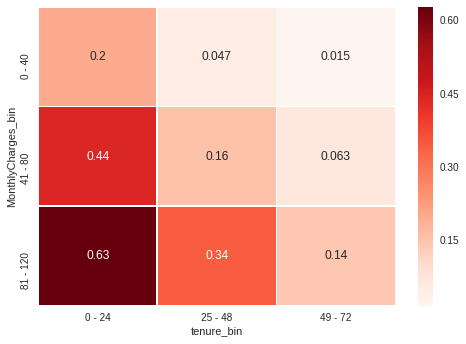

In [20]:

to_heat_pivot = tel.pivot_table(index = "MonthlyCharges_bin", columns = "tenure_bin", values = "Churn", aggfunc = "mean")

sns.heatmap(to_heat_pivot,annot=True, cmap = "Reds", linewidths=0.5)
plt.show()


There is a simple correltion if someone spends more many and staying shorter with our company share of Churn is growing

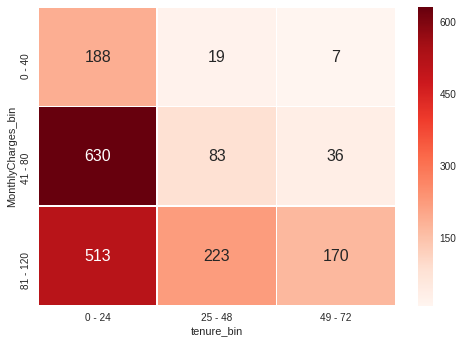

In [21]:
to_heat_pivot_sum = tel.pivot_table(index = "MonthlyCharges_bin", columns = "tenure_bin", values = "Churn", aggfunc = "sum")

sns.heatmap(to_heat_pivot_sum,annot=True, linewidths=0.5, cmap = "Reds", annot_kws = {"size": 16}, fmt = "d")
plt.show()

But most of our "1" (churned people) - about 60% - we have among people who pay Monthly 41 - 120 and stay with our company from 1 month to 24 month.

Lets prepare our finall df


In [86]:
tel_final = tel


In [87]:
tel_final = tel_final.drop(["TotalCharges", 'MonthlyCharges', 'tenure', "StreamingMovies", "customerID"], axis=1)

In [88]:
tel_final['Contract'] = tel_final['Contract'].map({'Month-to-month': "Month-to-month", 'One year': "LongTerm", 'Two year': "LongTerm"})
tel_final['PaymentMethod'] = tel_final['PaymentMethod'].map({'Electronic check': "ElectronicCheck", 'Mailed check': "OtherPaymentMethod", 'Bank transfer (automatic)': "OtherPaymentMethod", 'Credit card (automatic)': "OtherPaymentMethod"})

# Modeling

In [75]:
y = tel_final.Churn
X = pd.get_dummies(tel_final.iloc[:,1:19])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [78]:
X.drop(["StreamingTV_No internet service", "PaperlessBilling_No", "DeviceProtection_No", "DeviceProtection_No internet service", "OnlineSecurity_No", "OnlineSecurity_No internet service","Dependents_No", "TechSupport_No internet service", 'PhoneService_No', "OnlineBackup_No internet service", "SeniorCitizen_0", "Partner_Yes", "Contract_LongTerm", "StreamingTV_No", "TechSupport_No", 'gender_Female', "OnlineBackup_No", 'MultipleLines_No', 'MultipleLines_No phone service', "PaymentMethod_OtherPaymentMethod"], axis = 1, inplace=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 123)

In [80]:
from sklearn.pipeline import Pipeline
import pprint
from sklearn.model_selection import GridSearchCV, cross_val_score

In [81]:
models = [[("model",LogisticRegression())],
          [("model",DecisionTreeClassifier())],
          [("model",MultinomialNB())],
         [("model", RandomForestClassifier())]]
param_grids = [{"model__C":[0.01,0.1,1], "model__penalty":["l1","l2"]},
               {"model__min_samples_leaf":[1,10,50],"model__max_depth":[5,15,50]},
               {"model__alpha": [1, 0.01]},
              {"model__n_estimators": [10, 25, 50], "model__min_samples_leaf": [1, 15, 50]}]

In [82]:
best_models = []
for pipe, params in zip(models,param_grids):
    

    pipeline = Pipeline(pipe) 

    
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv = 5, n_jobs=-1)
    gs.fit(X_train,y_train)
    
    best_models.append(gs.best_estimator_) 


In [83]:
for best_model in best_models:
    print("Jakosc predykcji: ", accuracy_score(best_model.predict(X_test),y_test), "Recall: ", recall_score(best_model.predict(X_test),y_test))


Jakosc predykcji:  0.7981042654028436 Recall:  0.7262443438914027
Jakosc predykcji:  0.7800947867298578 Recall:  0.6956521739130435
Jakosc predykcji:  0.7886255924170616 Recall:  0.6535836177474402
Jakosc predykcji:  0.7815165876777251 Recall:  0.707808564231738


In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_score=gs.best_estimator_.predict(X_test), y_true=y_test)


0.6853573366172077

Our problem requires that we have to focus primarily on Recall and not on Precision.

The best Recall and accuracy score we got using Logistic Regression. Results are slighlty worse for RandomForestCalssification.

Especially NaiveBayesClassification got poor Recall scores.